In [2]:
import pickle

filename = "data/historical/election_results_2024_10_21_20000.pickle"
with open(filename, 'rb') as file:
    loaded_object = pickle.load(file)

In [3]:
len(loaded_object)

20000

In [4]:
loaded_object[0].keys()

dict_keys(['result_details', 'trump_votes', 'harris_votes'])

In [5]:
loaded_object[0]["result_details"]["Alabama"]

{'Trump': np.float64(55.6),
 'Harris': np.float64(29.4),
 'votes': 9,
 'winner': 'Trump',
 'date': '04/21/24'}

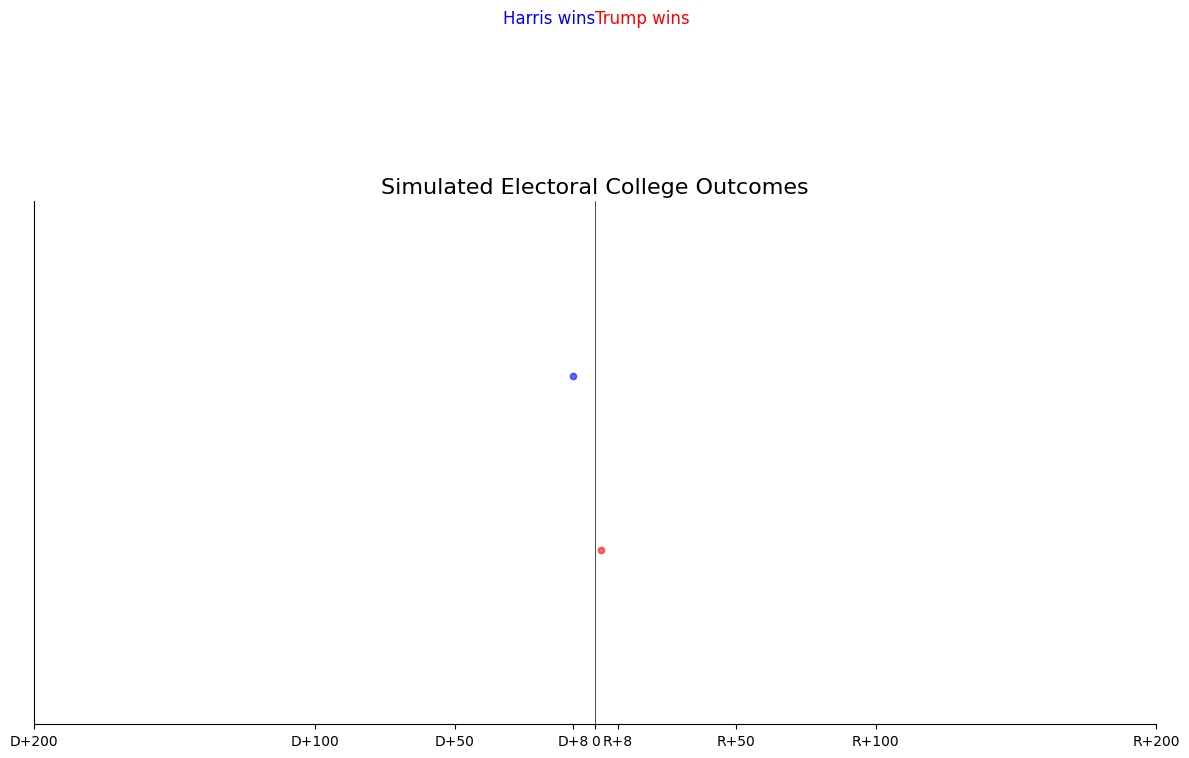

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def electoral_college_visualization(data):
    # Process the data
    differences = [item['trump_votes'] - item['harris_votes'] for item in data]
    winners = ['Trump' if diff > 0 else 'Harris' for diff in differences]

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot points
    for i, (diff, winner) in enumerate(zip(differences, winners)):
        color = 'red' if winner == 'Trump' else 'blue'
        ax.scatter(diff, i, c=color, s=20, alpha=0.6)

    # Set up the axes
    max_diff = max(abs(min(differences)), abs(max(differences)))
    ax.set_xlim(-max_diff, max_diff)
    ax.set_ylim(-1, len(data))

    # Remove y-axis ticks
    ax.set_yticks([])

    # Customize x-axis
    ax.set_xticks([-max_diff, -200, -100, -50, 0, 50, 100, 200, max_diff])
    ax.set_xticklabels([f'D+{max_diff}', 'D+200', 'D+100', 'D+50', '0', 'R+50', 'R+100', 'R+200', f'R+{max_diff}'])

    # Add vertical line at 0
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

    # Titles and labels
    ax.set_title('Simulated Electoral College Outcomes', fontsize=16)
    ax.text(0, len(data) + 1, 'Harris wins', ha='right', va='bottom', fontsize=12, color='blue')
    ax.text(0, len(data) + 1, 'Trump wins', ha='left', va='bottom', fontsize=12, color='red')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

# Example usage
data = [
    {'trump_votes': 270, 'harris_votes': 268},
    {'trump_votes': 265, 'harris_votes': 273},
    # Add more data points here...
]

electoral_college_visualization(data)

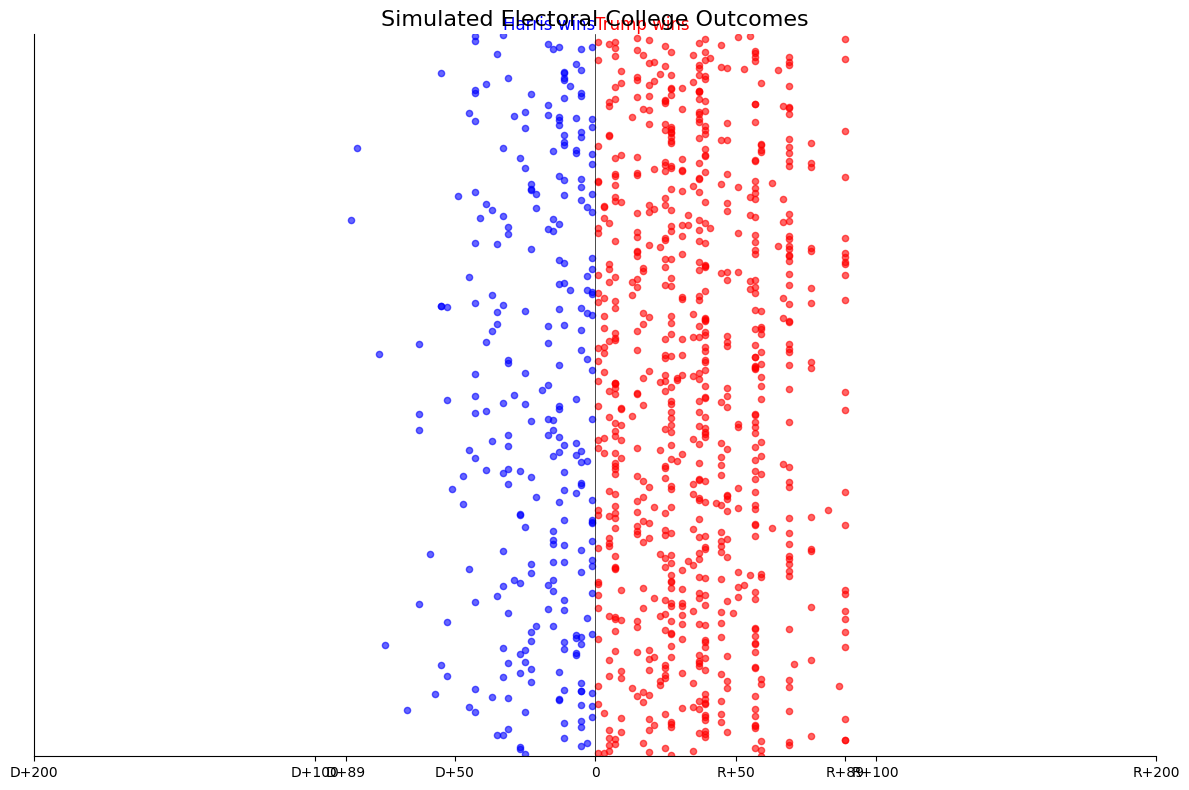

In [7]:
electoral_college_visualization(loaded_object[0:1000])

In [8]:
import plotly.graph_objects as go
import pandas as pd
def electoral_college_visualization_2(data):
    # Convert data to DataFrame
    df = pd.DataFrame(data)
    df['difference'] = df['trump_votes'] - df['harris_votes']
    df['winner'] = df['difference'].apply(lambda x: 'Trump' if x > 0 else 'Harris')

    # Create the scatter plot
    fig = go.Figure()

    # Add traces for Trump and Harris
    for winner, color in [('Trump', 'red'), ('Harris', 'blue')]:
        df_winner = df[df['winner'] == winner]
        fig.add_trace(go.Scattergl(
            x=df_winner['difference'],
            y=df_winner.index,
            mode='markers',
            name=winner,
            marker=dict(
                color=color,
                size=6,
                opacity=0.6
            ),
            hovertemplate=
            '<b>Winner:</b> %{text}<br>' +
            '<b>Difference:</b> %{x} votes<br>' +
            '<extra></extra>',
            text=df_winner['winner']
        ))

    # Update layout
    max_diff = max(abs(df['difference'].min()), abs(df['difference'].max()))
    fig.update_layout(
        title='Simulated Electoral College Outcomes',
        xaxis=dict(
            title='Vote Difference',
            range=[-max_diff, max_diff],
            tickvals=[-max_diff, -200, -100, -50, 0, 50, 100, 200, max_diff],
            ticktext=[f'D+{max_diff}', 'D+200', 'D+100', 'D+50', '0', 'R+50', 'R+100', 'R+200', f'R+{max_diff}'],
            zeroline=True,
            zerolinewidth=2,
            zerolinecolor='black'
        ),
        yaxis=dict(
            title='Simulation',
            showticklabels=False
        ),
        showlegend=False,
        annotations=[
            dict(x=-max_diff/2, y=1.05, xref="x", yref="paper", text="Harris wins", showarrow=False, font=dict(color="blue")),
            dict(x=max_diff/2, y=1.05, xref="x", yref="paper", text="Trump wins", showarrow=False, font=dict(color="red"))
        ]
    )

    # Show the plot
    fig.show()

In [9]:
electoral_college_visualization_2(loaded_object[0:2000])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

def electoral_college_visualization_3(data):
    df = pd.DataFrame(data)
    df['difference'] = df['trump_votes'] - df['harris_votes']

    # Count occurrences of each unique difference
    value_counts = df['difference'].value_counts().sort_index()

    # Create the figure
    fig = go.Figure()

    # Add bar chart (which will look like a histogram without bins)
    fig.add_trace(
        go.Bar(
            x=value_counts.index,
            y=value_counts.values,
            marker_color=['blue' if x < 0 else 'red' for x in value_counts.index],
            opacity=0.7,
            name='Vote Difference'
        )
    )

    # Update layout
    max_diff = max(abs(df['difference'].min()), abs(df['difference'].max()))
    fig.update_layout(
        title='Distribution of Simulated Electoral College Outcomes',
        xaxis=dict(
            title='Vote Difference',
            range=[-max_diff, max_diff],
            tickvals=[-max_diff, -200, -100, -50, -25, -10, 0, 10, 25, 50, 100, 200, max_diff],
            ticktext=[f'D+{max_diff}', 'D+200', 'D+100', 'D+50', 'D+25','D+10', '0', 'R+10', 'R+25', 'R+50', 'R+100', 'R+200', f'R+{max_diff}'],
            zeroline=True,
            zerolinewidth=2,
            zerolinecolor='black'
        ),
        yaxis=dict(
            title='Count of Simulations'
        ),
        showlegend=False,
        height=600,
        width=1000,
        bargap=0  # Remove gaps between bars
    )

    # Add annotations
    fig.add_annotation(x=-max_diff/2, y=1.05, xref="x", yref="paper", text="Harris wins", showarrow=False, font=dict(color="blue"))
    fig.add_annotation(x=max_diff/2, y=1.05, xref="x", yref="paper", text="Trump wins", showarrow=False, font=dict(color="red"))

    # Show the plot
    fig.show()

In [26]:
electoral_college_visualization_3(loaded_object[0:2000])

In [15]:
import os 
def iterate_pickles_directory(directory,dates=None):
    filtered_files_list = []
    files =  [f for f in os.listdir(directory) if f.endswith("pickle")]
    for file in files:
        if "_1000." in file:
            if dates:
                if any(date in file for date in dates):
                    filtered_files_list.append(file)
            else:
                filtered_files_list.append(file)

    return filtered_files_list
full_pickles_files = iterate_pickles_directory("./data/historical")

In [16]:
len(full_pickles_files)

101

In [18]:
for pic in full_pickles_files[0:5]:
    print(pic)

election_results_2024_08_09_1000.pickle
election_results_2024_09_10_1000.pickle
election_results_2024_08_27_1000.pickle
election_results_2024_10_03_1000.pickle
election_results_2024_09_22_1000.pickle


In [25]:
data_points = []
for pic in full_pickles_files:
    print(pic)
    filename = f"data/historical/{pic}"
    date_part = pic.split("election_results_")[1].split("_100")[0]
    # print(date_part)

    with open(filename, 'rb') as file:
        loaded_object = pickle.load(file)
        # print(loaded_object)
        df = pd.DataFrame(loaded_object)
        df['difference'] = df['trump_votes'] - df['harris_votes']
        df['winner'] = df['difference'].apply(lambda x: 'Trump' if x > 0 else 'Harris')
        harris_winning_combinations_ctn = df[df['winner']=='Harris']['winner'].count()
        trump_winning_combinations_ctn  = df[df['winner']=='Trump']['winner'].count()
        data_points.append({
            "date":date_part,
            "harris_winning_combinations_ctn":int(harris_winning_combinations_ctn),
            "trump_winning_combinations_ctn":int(trump_winning_combinations_ctn)
        })
    
print(data_points)


election_results_2024_08_09_1000.pickle
[{'date': '2024_08_09', 'harris_winning_combinations_ctn': 308, 'trump_winning_combinations_ctn': 692}]
